## Economics graph

- Download the .mtx graph file from https://networkrepository.com/soc-dolphins.php. 
- This file essentially is a matrix file depicting the edges of the graph.

In [ ]:
import numpy as np

dolphins = np.zeros((242, 242))

file1 = open('drive/MyDrive/EE5111/bn-macaque-rhesus_brain_1.edges', 'r')
Lines = file1.readlines()

for line in Lines:
  dolphins[int(line.split()[0]), int(line.split()[1])] = 1


In [ ]:
dolphins[0]

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

The graph has 242 nodes.

1 represents the presence of an edge, 0 represents the absence of an edge

## Transition matrix for simple random walk

In [ ]:
import numpy as np

In [ ]:
def gen_srw_transition(graph):

  vertices = graph.shape[0]
  trans_mtx = np.zeros((vertices, vertices))
  degrees = []

  for i in range(vertices):
    total_edges = np.sum(graph[i, :])
    degrees.append(total_edges)
    trans_mtx[i, :] = graph[i, :]/total_edges
  
  return trans_mtx, degrees

In [ ]:
srw_mtx, d = gen_srw_transition(dolphins)

In [ ]:
srw_mtx[0]

array([0.        , 0.02173913, 0.02173913, 0.02173913, 0.02173913,
       0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913,
       0.02173913, 0.02173913, 0.02173913, 0.02173913, 0.02173913,
       0.02173913, 0.        , 0.02173913, 0.        , 0.        ,
       0.02173913, 0.        , 0.02173913, 0.02173913, 0.02173913,
       0.02173913, 0.        , 0.        , 0.        , 0.02173913,
       0.02173913, 0.        , 0.02173913, 0.02173913, 0.        ,
       0.02173913, 0.02173913, 0.        , 0.        , 0.02173913,
       0.        , 0.        , 0.02173913, 0.02173913, 0.        ,
       0.        , 0.        , 0.        , 0.02173913, 0.        ,
       0.        , 0.02173913, 0.02173913, 0.        , 0.        ,
       0.02173913, 0.02173913, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02173913, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02173913, 0.02173

In [ ]:
sum(d)

4090.0

## Sum of non-convex functions

In [ ]:
# No: of datapoints
n = 242

# Dimension of paramater vector
k = 10

a_sum = np.zeros((k, k))
A = np.zeros((k, n))

for i in range(n):
  a = np.random.rand(k)
  A[:, i] = a
  a_sum += (a.reshape(k, 1) @ a.reshape(1, k))

a_sum /= n

try:
  print(np.linalg.inv(a_sum))
  print("Inverse exists")
except:
  print("Failed!")

D = np.zeros((k, k, n))

for i in range(k):
  D[i, i, :(n//2)] = 1.1
  D[i, i, (n//2):] = -1.1

b = np.random.rand(k, 1)




[[11.69546269 -1.01123195 -1.46432688 -0.28458392 -3.46601742 -1.49523946
  -1.23123778 -1.20140449 -0.39007068 -1.27250468]
 [-1.01123195 10.77554434 -1.61614636 -1.08765905 -1.23422968 -1.62031169
   0.14460814 -1.07626114 -1.71132114 -0.92269566]
 [-1.46432688 -1.61614636 10.7743962  -1.40031363  0.74749428 -1.60297677
  -1.39978453 -1.14017206 -0.63849871 -1.26053154]
 [-0.28458392 -1.08765905 -1.40031363 10.80142203 -0.24031276 -1.20713461
  -1.16454065 -1.95691778 -0.69087122 -1.8831776 ]
 [-3.46601742 -1.23422968  0.74749428 -0.24031276 11.57189339 -1.64563692
  -0.96849329 -1.73016601 -1.18046955 -1.45085099]
 [-1.49523946 -1.62031169 -1.60297677 -1.20713461 -1.64563692 10.73698625
  -1.71625808 -0.77849322 -0.87251283  0.6518242 ]
 [-1.23123778  0.14460814 -1.39978453 -1.16454065 -0.96849329 -1.71625808
  12.05914286 -1.20414772 -2.50380427 -2.09430559]
 [-1.20140449 -1.07626114 -1.14017206 -1.95691778 -1.73016601 -0.77849322
  -1.20414772 11.0651918  -1.74525409 -0.507793  ]


In [ ]:
theta_optim = -0.5*( np.linalg.inv(a_sum) @ b )

In [ ]:
theta_optim

array([[-1.67217187],
       [-0.83966925],
       [-0.88762965],
       [ 0.69301875],
       [ 0.86557343],
       [-1.29707623],
       [ 2.93073643],
       [-0.97464347],
       [ 0.50331288],
       [-0.65438915]])

In [ ]:
def fun(x):
  x = x.reshape(k, 1)
  return x.T @ a_sum @ x + b.T @ x

In [ ]:
from scipy.optimize import minimize

In [ ]:
test = minimize(fun, np.random.rand(k))

In [ ]:
test

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -1.8012968016677433
        x: [-1.672e+00 -8.397e-01 -8.876e-01  6.930e-01  8.656e-01
            -1.297e+00  2.931e+00 -9.746e-01  5.033e-01 -6.544e-01]
      nit: 21
      jac: [-5.409e-06 -4.753e-06 -3.844e-06 -5.275e-06 -9.075e-06
            -7.585e-06 -5.752e-06 -4.783e-06 -6.378e-06 -6.512e-06]
 hess_inv: [[ 4.678e+00  4.280e-01 ...  4.884e-01 -7.554e-01]
            [ 4.280e-01  2.253e+00 ... -1.120e+00 -8.174e-01]
            ...
            [ 4.884e-01 -1.120e+00 ...  2.258e+00  1.624e-01]
            [-7.554e-01 -8.174e-01 ...  1.624e-01  3.344e+00]]
     nfev: 242
     njev: 22

### Performing SGD

In [ ]:
import matplotlib.pyplot as plt

In [ ]:


losses = []

num_expts = 100

for expt in range(num_expts):

  print("Running experiment:", expt+1)

  ep_loss = []

  theta = np.random.rand(k, 1)

  num_iter = int(1e5)

  current_node = np.random.choice(np.arange(0, n))

  for i in range(1, num_iter + 1):

    a_i = A[:, current_node].reshape(k, 1)
    D_i = D[:, :, current_node].reshape(k, k)

    gamma = 1/(i**(0.9))

    grad_g = (sum(d)/(n*d[current_node]))*(2*( (a_i @ (a_i.T) + D_i) @ theta) + b)

    theta -= gamma * grad_g

    current_node = np.random.choice(np.arange(0, n), p = srw_mtx[current_node].reshape(n))  

    ep_loss.append(np.linalg.norm(theta - theta_optim)**2)
  
  losses.append(ep_loss)




Running experiment: 1
Running experiment: 2
Running experiment: 3
Running experiment: 4
Running experiment: 5
Running experiment: 6
Running experiment: 7
Running experiment: 8
Running experiment: 9
Running experiment: 10
Running experiment: 11
Running experiment: 12
Running experiment: 13
Running experiment: 14
Running experiment: 15
Running experiment: 16
Running experiment: 17
Running experiment: 18
Running experiment: 19
Running experiment: 20
Running experiment: 21
Running experiment: 22
Running experiment: 23
Running experiment: 24
Running experiment: 25
Running experiment: 26
Running experiment: 27
Running experiment: 28
Running experiment: 29
Running experiment: 30
Running experiment: 31
Running experiment: 32
Running experiment: 33
Running experiment: 34
Running experiment: 35
Running experiment: 36
Running experiment: 37
Running experiment: 38
Running experiment: 39
Running experiment: 40
Running experiment: 41
Running experiment: 42
Running experiment: 43
Running experiment: 

In [ ]:
exp_loss_srw = np.mean(np.array(losses), axis = 0)

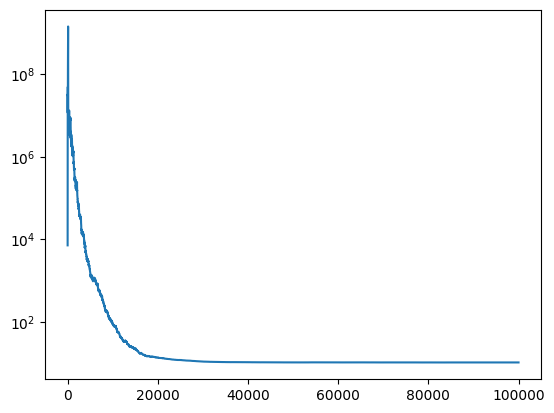

In [ ]:
plt.plot(np.arange(0, num_iter), (exp_loss_srw))
plt.yscale('log')

In [ ]:

losses_nbrw = []

num_expts = 100

for expt in range(num_expts):

  print("Running experiment:", expt+1)

  theta = np.random.rand(k, 1)

  num_iter = int(1e5)

  ep_loss = []

  current_node = np.random.choice(np.arange(0, n))

  for i in range(1, num_iter + 1):
  

    a_i = A[:, current_node].reshape(k, 1)
    D_i = D[:, :, current_node].reshape(k, k)

    gamma = 1/(i**(0.9))

    grad_g = (sum(d)/(n*d[current_node]))*(2*( (a_i @ (a_i.T) + D_i) @ theta) + b)

    theta -= gamma * grad_g

    if i == 1:
      previous_node = current_node
      current_node = np.random.choice(np.arange(0, n), p = srw_mtx[current_node].reshape(n))  

    else:
      probs_nbrw = dolphins[current_node].copy()
      probs_nbrw[previous_node] = 0
      if probs_nbrw.sum() == 0:
        probs_nbrw[previous_node] = 1
      else:
        probs_nbrw /= probs_nbrw.sum()
      previous_node = current_node
      current_node = np.random.choice(np.arange(0, n), p = probs_nbrw)
    
    ep_loss.append(np.linalg.norm(theta - theta_optim)**2)

  losses_nbrw.append(ep_loss)


Running experiment: 1
Running experiment: 2
Running experiment: 3
Running experiment: 4
Running experiment: 5
Running experiment: 6
Running experiment: 7
Running experiment: 8
Running experiment: 9
Running experiment: 10
Running experiment: 11
Running experiment: 12
Running experiment: 13
Running experiment: 14
Running experiment: 15
Running experiment: 16
Running experiment: 17
Running experiment: 18
Running experiment: 19
Running experiment: 20
Running experiment: 21
Running experiment: 22
Running experiment: 23
Running experiment: 24
Running experiment: 25
Running experiment: 26
Running experiment: 27
Running experiment: 28
Running experiment: 29
Running experiment: 30
Running experiment: 31
Running experiment: 32
Running experiment: 33
Running experiment: 34
Running experiment: 35
Running experiment: 36
Running experiment: 37
Running experiment: 38
Running experiment: 39
Running experiment: 40
Running experiment: 41
Running experiment: 42
Running experiment: 43
Running experiment: 

In [ ]:
exp_loss_nbrw = np.mean(np.array(losses_nbrw), axis = 0)

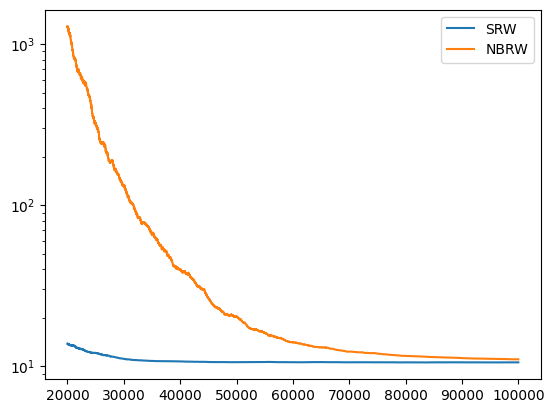

In [ ]:
plt.plot(np.arange(20000, num_iter), (exp_loss_srw[20000:]), label = 'SRW')
plt.plot(np.arange(20000, num_iter), (exp_loss_nbrw[20000:]), label = 'NBRW')
plt.yscale('log')
plt.legend()

#### Uniform sampling

In [ ]:

losses_us = []

num_expts = 100

for expt in range(num_expts):

  print("Running experiment:", expt+1)


  theta = np.random.rand(k, 1)

  num_iter = int(1e5)

  ep_loss = []

  for i in range(1, num_iter + 1):

    current_node = np.random.choice(np.arange(0, n))

    a_i = A[:, current_node].reshape(k, 1)
    D_i = D[:, :, current_node].reshape(k, k)

    gamma = 1/(i**(0.9))

    grad_g = 2*( (a_i @ (a_i.T) + D_i) @ theta) + b

    theta -= gamma * grad_g

    ep_loss.append(np.linalg.norm(theta - theta_optim)**2)
  
  losses_us.append(ep_loss)

Running experiment: 1
Running experiment: 2
Running experiment: 3
Running experiment: 4
Running experiment: 5
Running experiment: 6
Running experiment: 7
Running experiment: 8
Running experiment: 9
Running experiment: 10
Running experiment: 11
Running experiment: 12
Running experiment: 13
Running experiment: 14
Running experiment: 15
Running experiment: 16
Running experiment: 17
Running experiment: 18
Running experiment: 19
Running experiment: 20
Running experiment: 21
Running experiment: 22
Running experiment: 23
Running experiment: 24
Running experiment: 25
Running experiment: 26
Running experiment: 27
Running experiment: 28
Running experiment: 29
Running experiment: 30
Running experiment: 31
Running experiment: 32
Running experiment: 33
Running experiment: 34
Running experiment: 35
Running experiment: 36
Running experiment: 37
Running experiment: 38
Running experiment: 39
Running experiment: 40
Running experiment: 41
Running experiment: 42
Running experiment: 43
Running experiment: 

In [ ]:
exp_loss_us = np.mean(np.array(losses_us), axis = 0)


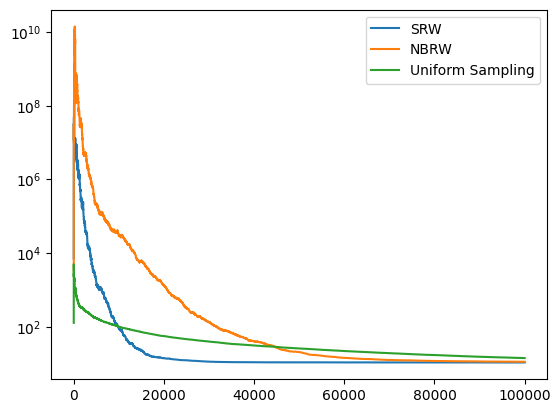

In [ ]:
plt.plot(np.arange(0, num_iter), (exp_loss_srw), label = 'SRW')
plt.plot(np.arange(0, num_iter), (exp_loss_nbrw), label = 'NBRW')
plt.plot(np.arange(0, num_iter), (exp_loss_us), label = 'Uniform Sampling')
plt.yscale('log')
plt.legend()

#### Single shuffling

In [ ]:
losses_ss = []

num_expts = 100

for expt in range(num_expts):

  print("Running experiment:", expt+1)

  node_perm = np.random.permutation(np.arange(0, n))

  theta = np.random.rand(k, 1)

  num_iter = int(1e5)

  ep_loss = []

  for i in range(1, num_iter + 1):

    current_node = node_perm[(i-1)%n]

    a_i = A[:, current_node].reshape(k, 1)
    D_i = D[:, :, current_node].reshape(k, k)

    gamma = 1/(i**(0.9))

    grad_g = 2*( (a_i @ (a_i.T) + D_i) @ theta) + b

    theta -= gamma * grad_g

    ep_loss.append(np.linalg.norm(theta - theta_optim)**2)

  losses_ss.append(ep_loss)

Running experiment: 1
Running experiment: 2
Running experiment: 3
Running experiment: 4
Running experiment: 5
Running experiment: 6
Running experiment: 7
Running experiment: 8
Running experiment: 9
Running experiment: 10
Running experiment: 11
Running experiment: 12
Running experiment: 13
Running experiment: 14
Running experiment: 15
Running experiment: 16
Running experiment: 17
Running experiment: 18
Running experiment: 19
Running experiment: 20
Running experiment: 21
Running experiment: 22
Running experiment: 23
Running experiment: 24
Running experiment: 25
Running experiment: 26
Running experiment: 27
Running experiment: 28
Running experiment: 29
Running experiment: 30
Running experiment: 31
Running experiment: 32
Running experiment: 33
Running experiment: 34
Running experiment: 35
Running experiment: 36
Running experiment: 37
Running experiment: 38
Running experiment: 39
Running experiment: 40
Running experiment: 41
Running experiment: 42
Running experiment: 43
Running experiment: 

In [ ]:
exp_loss_ss = np.mean(np.array(losses_ss), axis = 0)

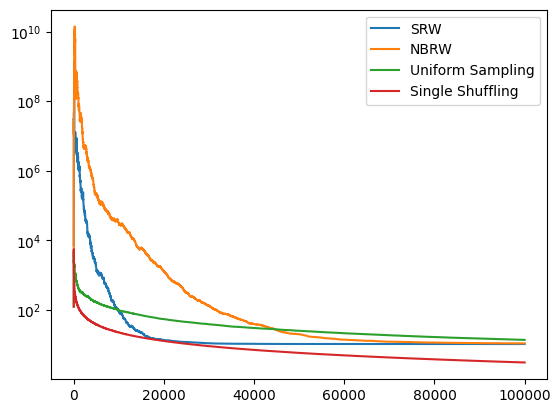

In [ ]:
plt.plot(np.arange(0, num_iter), (exp_loss_srw), label = 'SRW')
plt.plot(np.arange(0, num_iter), (exp_loss_nbrw), label = 'NBRW')
plt.plot(np.arange(0, num_iter), (exp_loss_us), label = 'Uniform Sampling')
plt.plot(np.arange(0, num_iter), (exp_loss_ss), label = 'Single Shuffling')
plt.yscale('log')
plt.legend()

#### Random shuffling

In [ ]:
losses_rs = []

num_expts = 100

for expt in range(num_expts):

  print("Running experiment:", expt+1)

  theta = np.random.rand(k, 1)

  num_iter = int(1e5)

  ep_loss = []

  for i in range(1, num_iter + 1):

    if (i-1)%n == 0:
      node_perm = np.random.permutation(np.arange(0, n))

    current_node = node_perm[(i-1)%n]

    a_i = A[:, current_node].reshape(k, 1)
    D_i = D[:, :, current_node].reshape(k, k)

    gamma = 1/(i**(0.9))

    grad_g = 2*( (a_i @ (a_i.T) + D_i) @ theta) + b

    theta -= gamma * grad_g

    ep_loss.append(np.linalg.norm(theta - theta_optim)**2)

  losses_rs.append(ep_loss)

Running experiment: 1
Running experiment: 2
Running experiment: 3
Running experiment: 4
Running experiment: 5
Running experiment: 6
Running experiment: 7
Running experiment: 8
Running experiment: 9
Running experiment: 10
Running experiment: 11
Running experiment: 12
Running experiment: 13
Running experiment: 14
Running experiment: 15
Running experiment: 16
Running experiment: 17
Running experiment: 18
Running experiment: 19
Running experiment: 20
Running experiment: 21
Running experiment: 22
Running experiment: 23
Running experiment: 24
Running experiment: 25
Running experiment: 26
Running experiment: 27
Running experiment: 28
Running experiment: 29
Running experiment: 30
Running experiment: 31
Running experiment: 32
Running experiment: 33
Running experiment: 34
Running experiment: 35
Running experiment: 36
Running experiment: 37
Running experiment: 38
Running experiment: 39
Running experiment: 40
Running experiment: 41
Running experiment: 42
Running experiment: 43
Running experiment: 

In [ ]:
exp_loss_rs = np.mean(np.array(losses_rs), axis = 0)

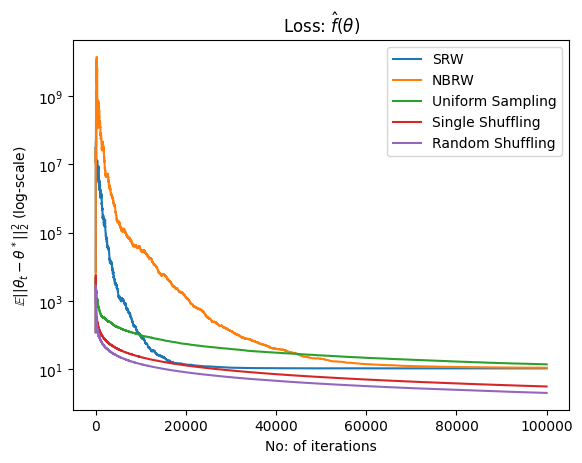

In [ ]:
plt.plot(np.arange(1, num_iter+1), (exp_loss_srw), label = 'SRW')
plt.plot(np.arange(1, num_iter+1), (exp_loss_nbrw), label = 'NBRW')
plt.plot(np.arange(1, num_iter+1), (exp_loss_us), label = 'Uniform Sampling')
plt.plot(np.arange(1, num_iter+1), (exp_loss_ss), label = 'Single Shuffling')
plt.plot(np.arange(1, num_iter+1), (exp_loss_rs), label = 'Random Shuffling')
plt.yscale('log')
plt.title(r"Loss: $\hat{f}(\theta)$")
plt.ylabel(r"$\mathbb{E}||\theta_t - \theta^*||^2_2$ (log-scale)")
plt.xlabel("No: of iterations")
plt.legend()
plt.savefig("drive/MyDrive/EE5111/convex_loss_macaque.eps", format='eps', bbox_inches = 'tight')

In [ ]:
gammas = [1/(x**(0.9)) for x in range(1, num_iter+1)]

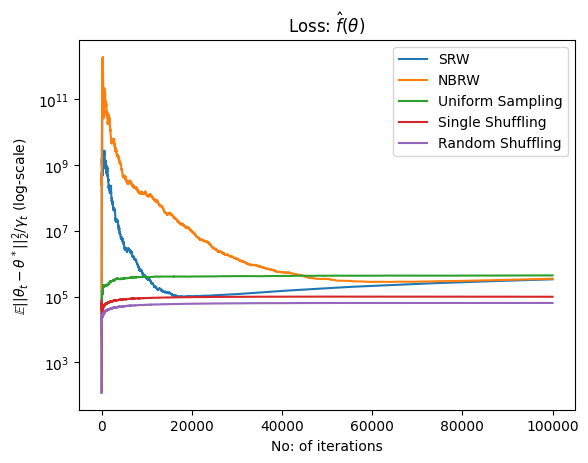

In [ ]:
plt.plot(np.arange(0, num_iter), (exp_loss_srw/gammas), label = 'SRW')
plt.plot(np.arange(0, num_iter), (exp_loss_nbrw/gammas), label = 'NBRW')
plt.plot(np.arange(0, num_iter), (exp_loss_us/gammas), label = 'Uniform Sampling')
plt.plot(np.arange(0, num_iter), (exp_loss_ss/gammas), label = 'Single Shuffling')
plt.plot(np.arange(0, num_iter), (exp_loss_rs/gammas), label = 'Random Shuffling')
plt.yscale('log')
plt.title(r"Loss: $\hat{f}(\theta)$")
plt.ylabel(r"$\mathbb{E}||\theta_t - \theta^*||^2_2 / \gamma_t$ (log-scale)")
plt.xlabel("No: of iterations")
plt.legend()
plt.savefig("drive/MyDrive/EE5111/convex_loss_gamma_macaque.eps", format='eps', bbox_inches = 'tight')